In [32]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set(rc={'figure.figsize':(16,10)})

df = pd.read_csv(os.path.join('data','voice.csv'))
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [33]:
list(df.columns)

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx',
 'label']

In [34]:
first_half = df.head(len(df)//2)
ratio = len(first_half['label'] == 'male')/len(first_half)*100
print(f'Percentage of male entries in first half: {ratio}%')

Percentage of male entries in first half: 100.0%


In [35]:
#Are the values centroid and meanfreq the same?

len(df[df['centroid']==df['meanfreq']])/len(df)
print(f'Percentage of entries where centroid = frequency: {ratio}%')

Percentage of entries where centroid = frequency: 100.0%


## Evaluation

The raw dataset contains 3168 entries each with 21 features. A voice sample was recorded for each entry and statistical measures were performed on it and tabulated. (eg. mean frequency, standard deviation of frequency, etc..)

Intuitively, we would expect that <b>meanfreq</b> to be the most contributing factor to the discrimination between male and female, because males have a lower frequency then females.

Notable features:
<ul>
    <li><b>IQR</b> - The interquartile range, Q25 and Q75, are calculated on the frequencies sampled from the voice recording.</li>
    <li><b>sp.ent</b> - Spectral Entropy. The sepctral power distribution along with forecastability of time. Spectral Power is the amplitude of the different frequency components (pure sine waves) that make up the entire signal.</li>
    <li><b>sfm</b> - Spectral Flatness.  <a href"https://en.wikipedia.org/wiki/Spectral_flatness">Quantifies how much a sound resembles a pure tone, as opposed to being noise-like.</a></li>
    <li><b>Fundamental Frequency</b> - <a href="https://en.wikipedia.org/wiki/Fundamental_frequency">The lowest frequency of a sinusodial waveform making up our sound.</a> This term encapsulates the variables <b>meanfun, minfun, and  maxfun</b></li>
    <li><b>Dominant Frequency</b> - The frequency that is the most heard, and is always a multiple of the fundamental frequency. The dominant frequency may be equal to the fundamental frequency. This term encapsulates the variables <b>meandom, mindom, maxdom, dfrange</b></li>
    <li><b>modindx</b> - Modulation Index. <a href="https://en.wikipedia.org/wiki/Frequency_modulation#Modulation_index">Defined as the ratio of the peak frequency deviation of the carrier wave to the frequency of the modulating sine wave.</a> We will futher explore how this variable changes between men and women. </li>
</ul>

<b>All frequencies are in kHz!</b> It is also important to notice that the data is sorted by the label and hence we need to shuffle it in order to create an appropriate train-test split. Moreover, <i>centroid</i> and <i>meanfreq</i> are actually the same value across all entries.

### Let's compare how the features change between men and women.

<b>Mean Frequency, Median Frequency, Mode Freqeuncy</b>

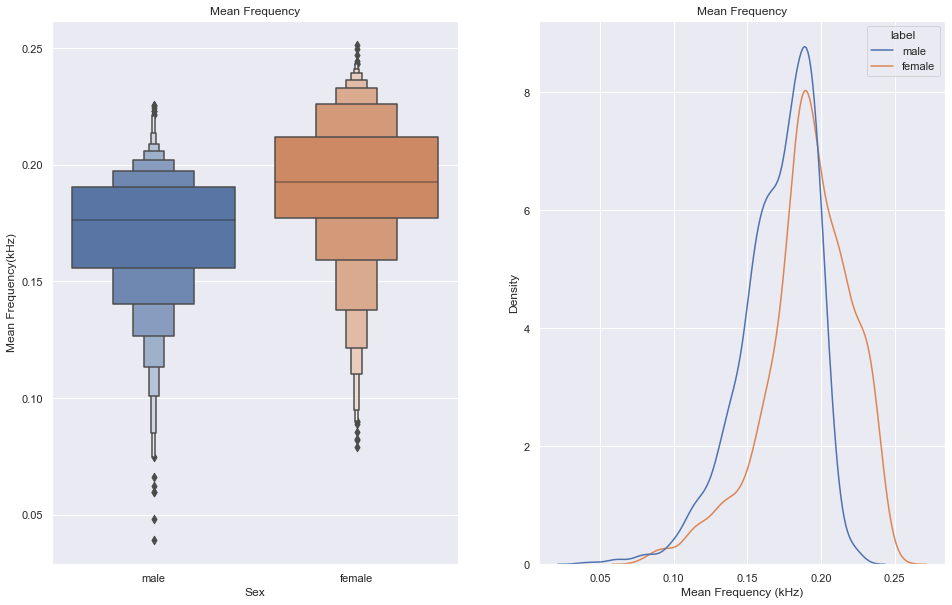

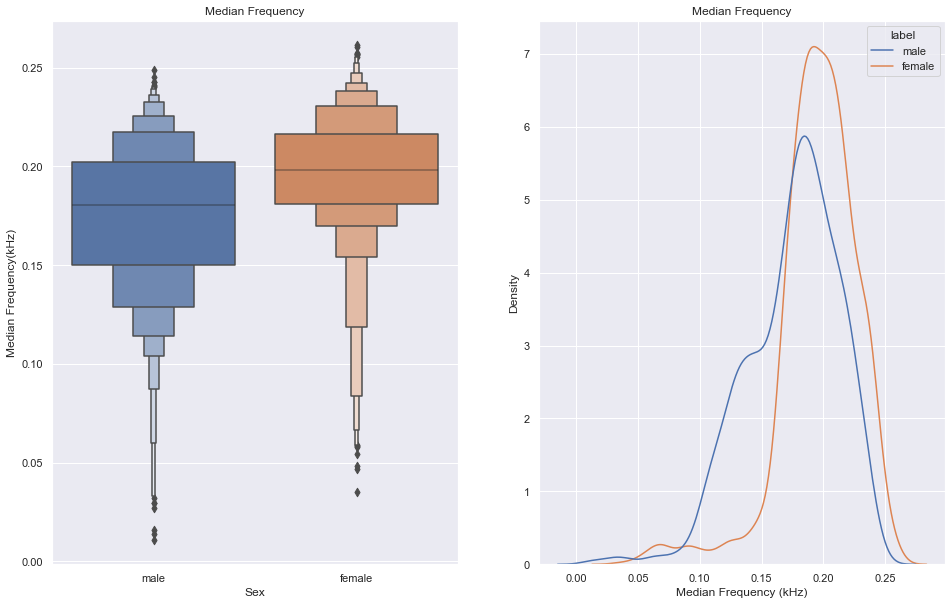

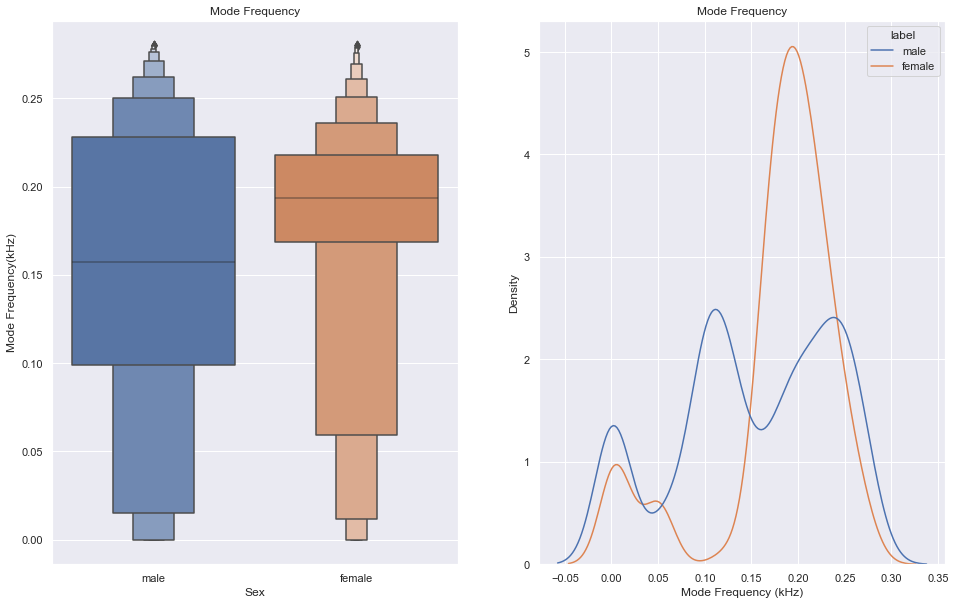

In [36]:
for feature,title in [('meanfreq','Mean Frequency'),
                       ('median','Median Frequency'),
                       ('mode','Mode Frequency')]:

    fig, (ax1,ax2) = plt.subplots(1,2)
    

    sns.boxenplot(data=df,
                x='label', y=feature,
                ax=ax1)

    ax1.set_title(title)
    ax1.set_xlabel('Sex')
    ax1.set_ylabel(f'{title}(kHz)')


    sns.kdeplot(data=df,
                x=feature, hue='label',
                ax=ax2)

    ax2.set_title(title)
    ax2.set_xlabel(f'{title} (kHz)')
    
    plt.show()

As we can see above, males tend to have a lower voice than females. However, except for the edge cases, we can't reliably predict, if a voice is male or female from the frequency alone, as the clusters are relatively close together.

The most informative feature is the <i>mode</i> as it has the most varied distribution.

<b>Whose frequencies are more spread out during the voice recording?</b>

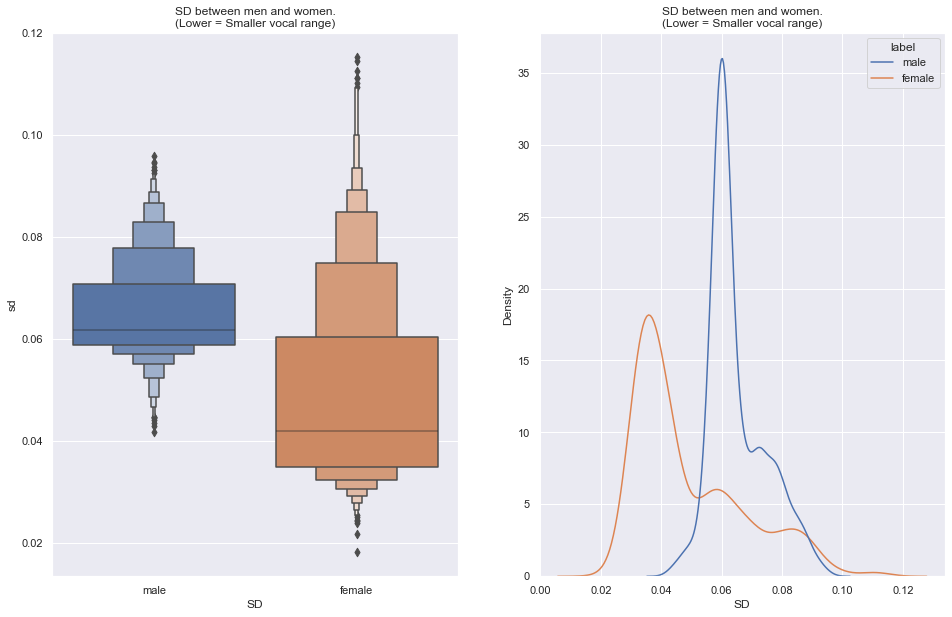

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            y='sd', x='label',
            ax=ax1)
ax1.set_title('SD between men and women.\n(Lower = Smaller vocal range)')
ax1.set_xlabel('SD')

sns.kdeplot(data=df,
            x='sd',hue='label',
            ax=ax2)

ax2.set_title('SD between men and women.\n(Lower = Smaller vocal range)')
ax2.set_xlabel('SD')


plt.show()

As we can see below, females tend to have a more constrained vocal range when speaking, as opposed to males. We could also deduce this from the above graph, as the catplot is more stretched out.

Males tend to have the SD of their frequencies be in the range 0.06-0.08. However females have a larger range*, tending to be in the range 0.04-0.08. Approximately, no male has a SD less than 0.04 or more then 0.1. Hence any voice outside these ranges must be of a woman.

<i>*Range meaning that some females have a constrained vocal range, while others have a broader vocal range, as opposed to males, which the vast majority of all have more or less the same vocal range.</i>

### Comparing the other features

<b>Evaluating skew</b>

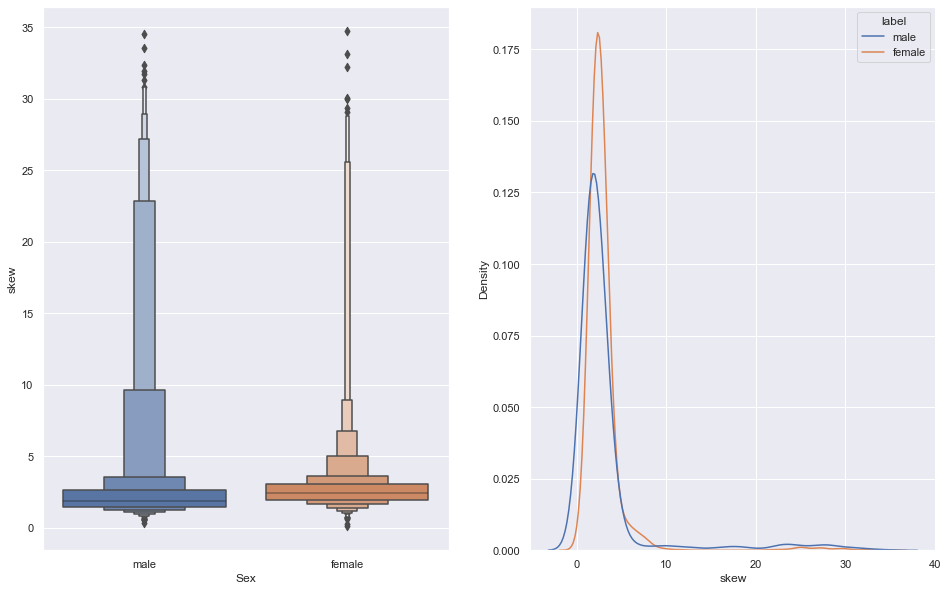

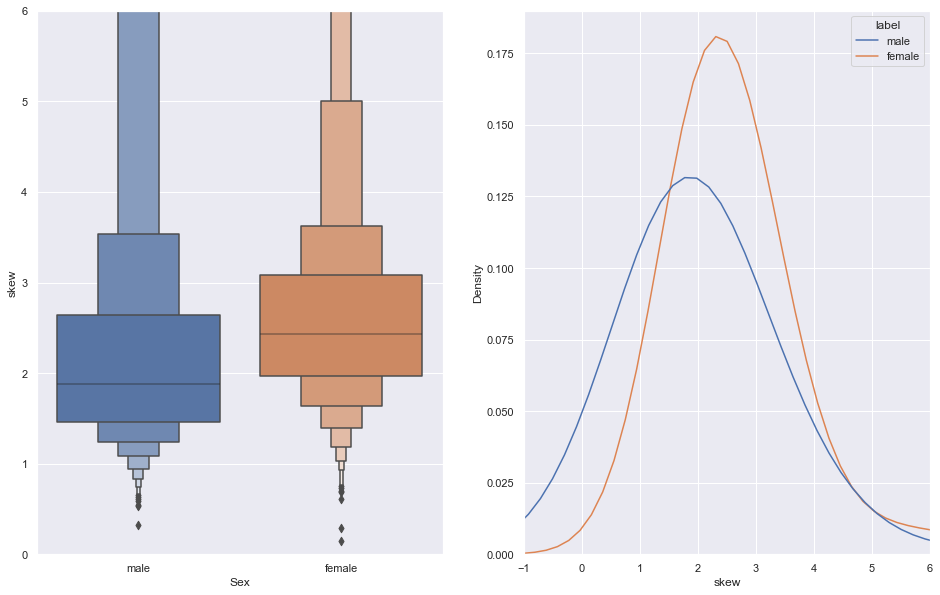

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='skew',
            ax=ax1)

ax1.set_xlabel('Sex')


sns.kdeplot(data=df,
            x='skew', hue='label',
            ax=ax2)


plt.show()

#############################################################
#Limiting range

fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='skew',
            ax=ax1)

ax1.set_xlabel('Sex')
ax1.set_ylim(0,6)


sns.kdeplot(data=df,
            x='skew', hue='label',
            ax=ax2)

ax2.set_xlim(-1,6)

plt.show()


From the graph we can see that there are a lot of outliers for this feature. Moreover, there doesn't seem to be any obvious distinction that machine learning algorithms may use to classify as male or female.

<b>Evaluating kurtosis</b>

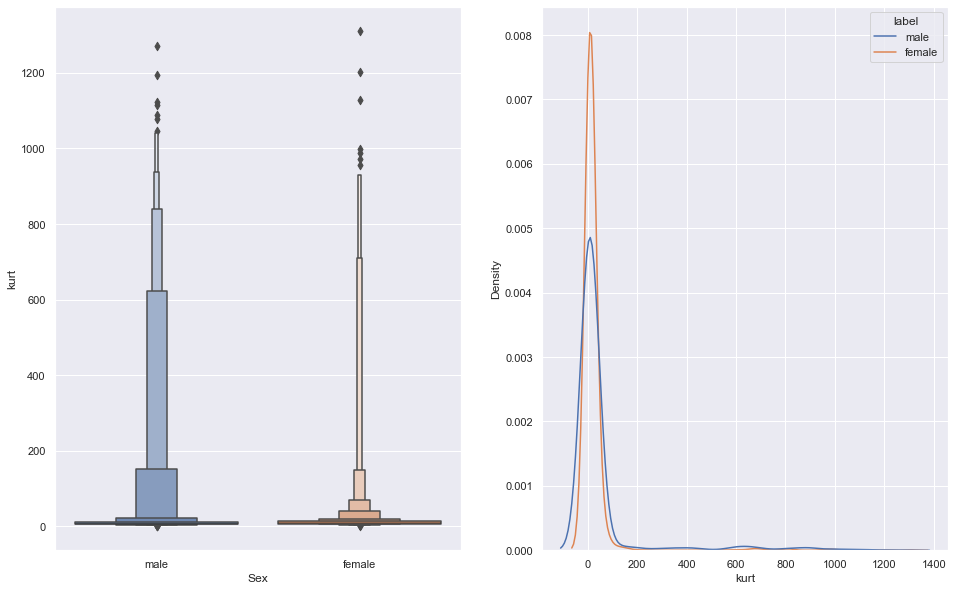

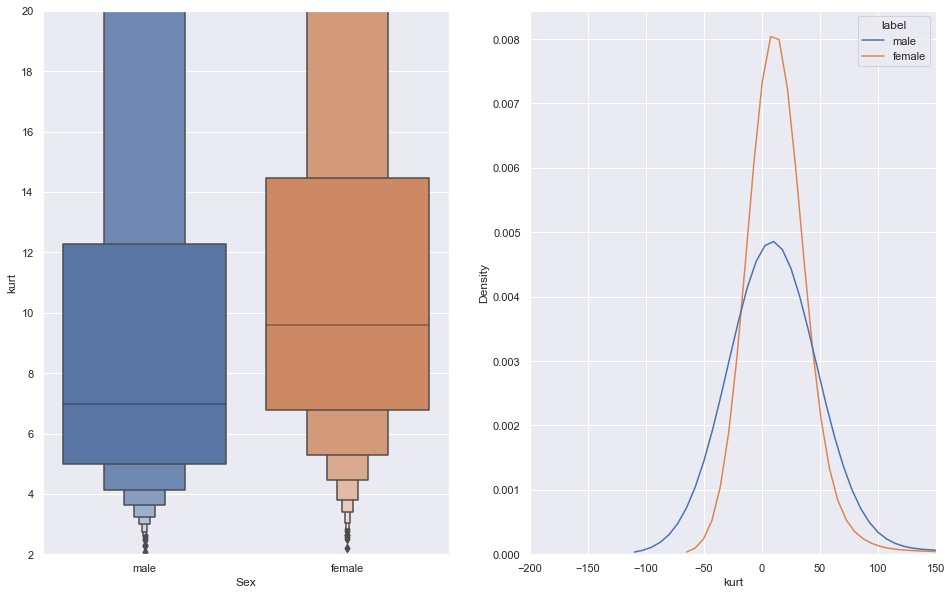

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='kurt',
            ax=ax1)

ax1.set_xlabel('Sex')


sns.kdeplot(data=df,
            x='kurt', hue='label',
            ax=ax2)

plt.show()

#############################################################
#Limiting range

fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='kurt',
            ax=ax1)

ax1.set_xlabel('Sex')
ax1.set_ylim(2,20)


sns.kdeplot(data=df,
            x='kurt', hue='label',
            ax=ax2)

ax2.set_xlim(-200,150)

plt.show()


From the graph we can see that there are a lot of outliers for this feature. Moreover, there doesn't seem to be any obvious distinction that machine learning algorithms may use to classify as male or female.

<b>Evaluating modindx and dfrange</b>

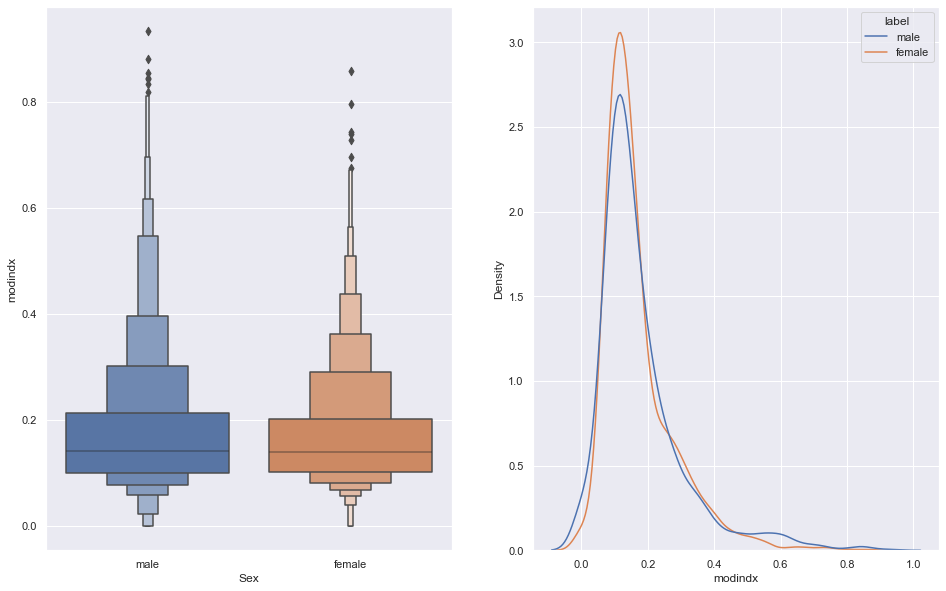

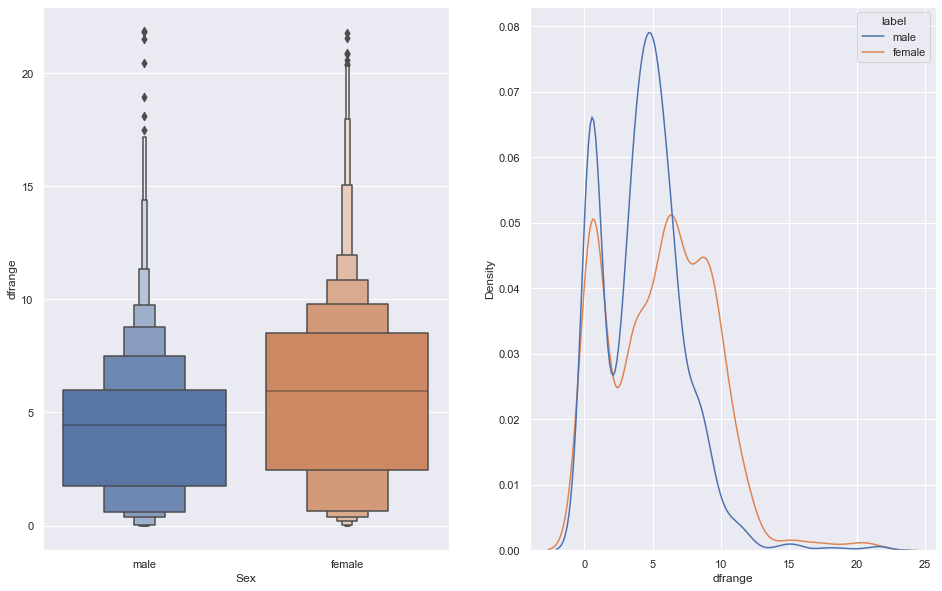

In [40]:
#modindx
fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='modindx',
            ax=ax1)

ax1.set_xlabel('Sex')


sns.kdeplot(data=df,
            x='modindx', hue='label',
            ax=ax2)

plt.show()

#dfrange
fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='dfrange',
            ax=ax1)

ax1.set_xlabel('Sex')


sns.kdeplot(data=df,
            x='dfrange', hue='label',
            ax=ax2)

plt.show()

<i>modindx</i> is virtually the same across both sexes. <i>dfrange</i> might encode valuable information.

<b>Evaluating Q25, Q75, IQR</b>

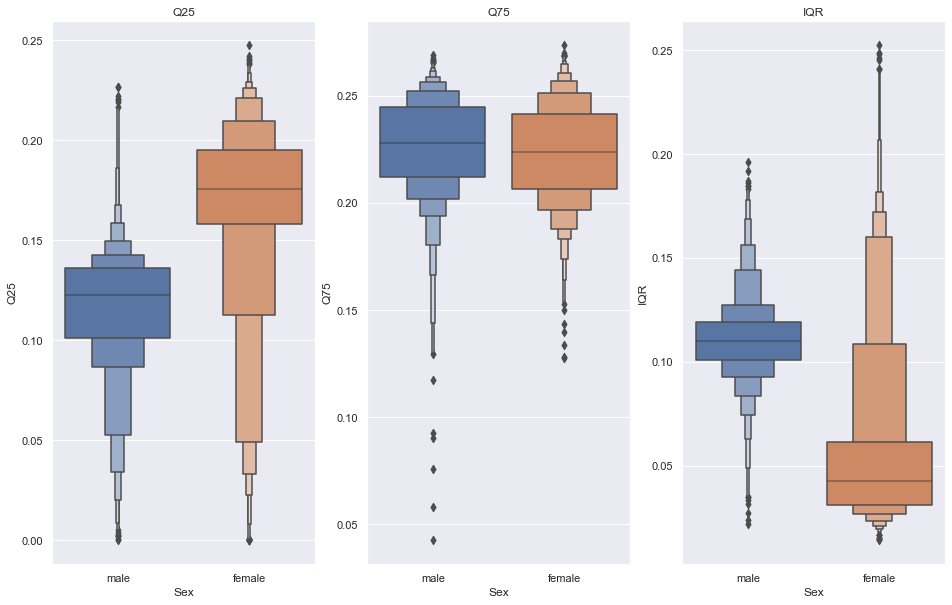

In [41]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

sns.boxenplot(data=df,
            x='label', y='Q25',
            ax=ax1)

ax1.set_xlabel('Sex')
ax1.set_title('Q25')

sns.boxenplot(data=df,
            x='label', y='Q75',
            ax=ax2)

ax2.set_xlabel('Sex')
ax2.set_title('Q75')

sns.boxenplot(data=df,
            x='label', y='IQR',
            ax=ax3)

ax3.set_xlabel('Sex')
ax3.set_title('IQR')

plt.show()

Q25 and IQR seem to be informative while Q75 does not.

<b>Evaluating sp.ent and sfm</b>

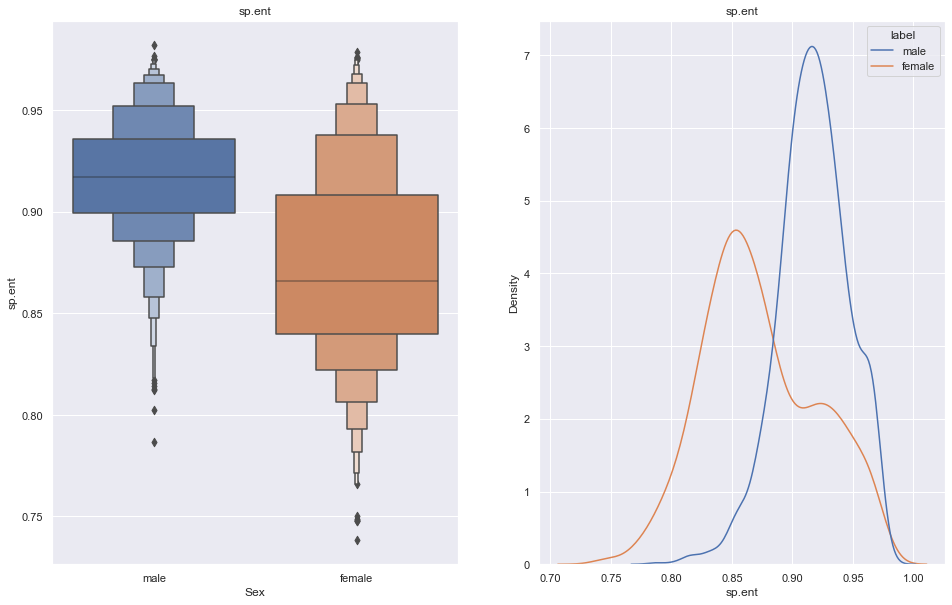

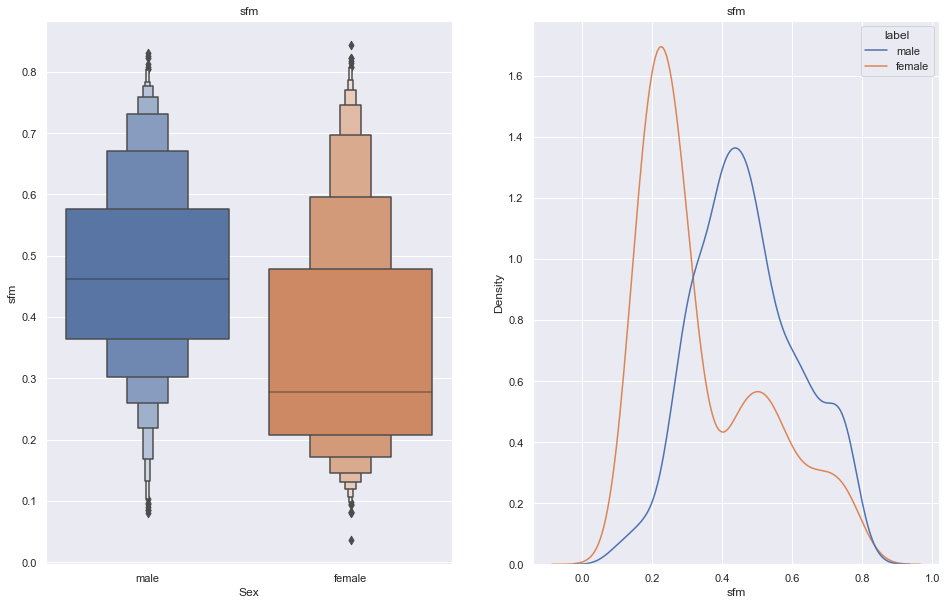

In [42]:
fig, (ax1,ax2) = plt.subplots(1,2)

sns.boxenplot(data=df,
            x='label', y='sp.ent',
            ax=ax1)
ax1.set_xlabel('Sex')
ax1.set_title('sp.ent')


sns.kdeplot(data=df,
            x='sp.ent', hue='label',
            ax=ax2)
ax2.set_title('sp.ent')

plt.show()

fig, (ax1,ax2) = plt.subplots(1,2)
sns.boxenplot(data=df,
            x='label', y='sfm',
            ax=ax1)
ax1.set_xlabel('Sex')
ax1.set_title('sfm')

sns.kdeplot(data=df,
            x='sfm', hue='label',
            ax=ax2)
ax2.set_title('sfm')

plt.show()

<i>sp.ent</i> and <i>sfm</i> appear informative.

<b>Evaluating minfun, maxfun, and meanfun.</b>

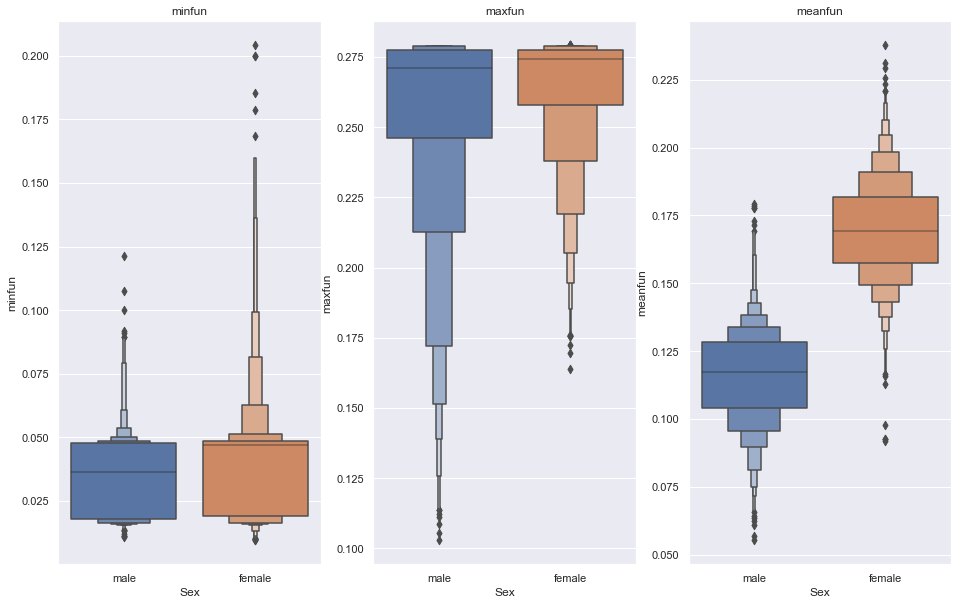

In [43]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

sns.boxenplot(data=df,
            x='label', y='minfun',
            ax=ax1)
ax1.set_xlabel('Sex')
ax1.set_title('minfun')

sns.boxenplot(data=df,
            x='label', y='maxfun',
            ax=ax2)
ax2.set_xlabel('Sex')
ax2.set_title('maxfun')

sns.boxenplot(data=df,
            x='label', y='meanfun',
            ax=ax3)
ax3.set_xlabel('Sex')
ax3.set_title('meanfun')


plt.show()

<i>meanfun</i> appears to be very informative, unlike the others.

<b>Evaluating mindom, maxdom and meandom</b>

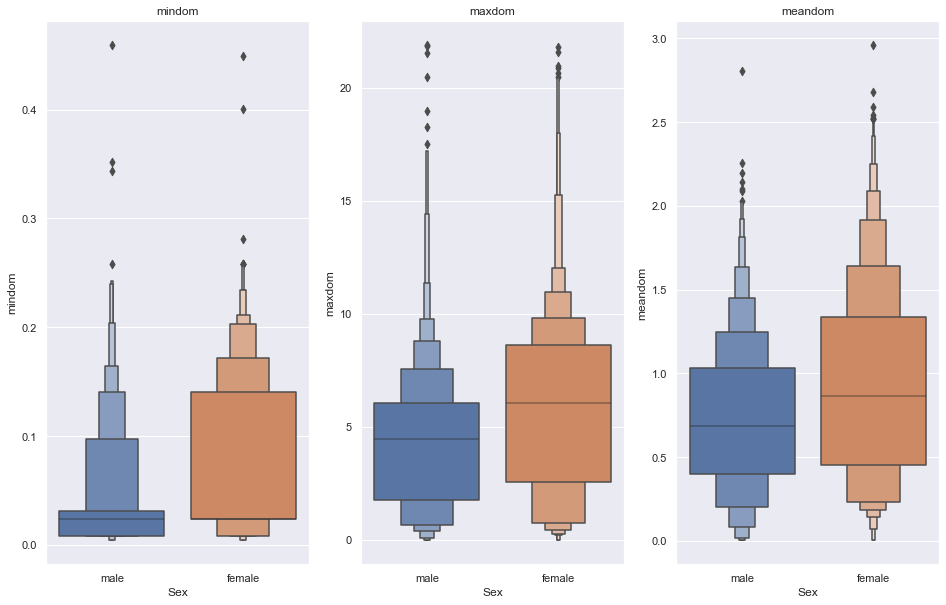

In [44]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

sns.boxenplot(data=df,
            x='label', y='mindom',
            ax=ax1)
ax1.set_xlabel('Sex')
ax1.set_title('mindom')

sns.boxenplot(data=df,
            x='label', y='maxdom',
            ax=ax2)
ax2.set_xlabel('Sex')
ax2.set_title('maxdom')

sns.boxenplot(data=df,
            x='label', y='meandom',
            ax=ax3)
ax3.set_xlabel('Sex')
ax3.set_title('meandom')


plt.show()

<i>mindom</i> appear to be informtive but the others do not.

## Final verdict
After evaluating all 20 features, we will decide which will we deem worthy in terms of distinction between the two sexes. Features will be ranked from uninformative to informative.

 <table>
  <tr>
    <th>Features</th> <th>Informative</th>
  </tr>
  <tr>
    <td>meanfreq</td> <td>Low</td>
  </tr>
  <tr>
    <td>median</td> <td>Low</td>
  </tr>
  <tr>
    <td>mode</td> <td>Low</td>
  </tr>
  <tr>
    <td>centroid</td> <td>NUL</td>
  </tr>
  <tr>
    <td>sd</td> <td>High</td>
  </tr>
  <tr>
    <td>skew</td> <td>Low</td>
  </tr>  
  <tr>
    <td>kurt</td> <td>Low</td>
  </tr>
  <tr>
    <td>Q25</td> <td>High</td>
  </tr>
  <tr>
    <td>Q75</td> <td>Low</td>
  </tr>
  <tr>
    <td>IQR</td> <td>High</td>
  </tr>
  <tr>
    <td>minfun</td> <td>Low</td>
  </tr>
  <tr>
    <td>maxfun</td> <td>Low</td>
  </tr>
  <tr>
    <td>meanfun</td> <td>High</td>
  </tr>
  <tr>
    <td>mindom</td> <td>Mid</td>
  </tr>
  <tr>
    <td>maxdom</td> <td>Low</td>
  </tr>
  <tr>
    <td>meandom</td> <td>Low</td>
  </tr>
  <tr>
    <td>sp.ent</td> <td>High</td>
  </tr>
  <tr>
    <td>sfm</td> <td>Mid</td>
  </tr>
  <tr>
    <td>dfrange</td> <td>Mid</td>
  </tr>
  <tr>
    <td>modindx</td> <td>Low</td>
  </tr>
</table> 

## Transforming the dataset

We will perform the following transformation on the data in order to make it digestible by machine learning algorithms:

<ul>
    <li>Label Encoding</li>
    <li>Removing redundant data</li>
    <li>Removing uninformative data</li>
    <li>Data Scaling</li>
    <li>Random Shuffling - (First half of data is male)</li>
</ul>

In [45]:
# Label Encoding
df['label'].replace(
    {'male': 0, 'female': 1},
    inplace=True
)

# Remove centroid
df = df.drop(['centroid'], axis=1)

# Standard Scaler
x = df.loc[:, df.columns != 'label']

df.loc[:, df.columns != 'label'] = StandardScaler().fit_transform(x)

# Random Shuffle
df = df.sample(frac=1).reset_index(drop=True)

# Save dataframe as csv
df.to_csv(os.path.join('data', 'data_all.csv'), index=False)

##################

# Remove 'Low' information features
df = df.drop(['meanfreq', 'median', 'mode', 'skew', 'kurt', 'Q75',
              'minfun', 'maxfun', 'maxdom', 'meandom', 'modindx'],
             axis=1)

# Save filtered dataframe as csv
df.to_csv(os.path.join('data', 'data_filtered.csv'), index=False)